<a href="https://colab.research.google.com/github/sutummala/brainTumor-ViT/blob/main/mat_to_numpy_figshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hdf5storage

     |████████████████████████████████| 53 kB 1.4 MB/s 


In [ ]:
import os
import numpy as np
import hdf5storage
import cv2
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/figshare-brain-tumor/1512427/'

folders = np.sort(os.listdir(data_dir))

for folder in folders:
    print(folder)

README.txt
brainTumorDataPublic_1-766
cvind.mat


In [ ]:
files = np.sort(os.listdir(os.path.join(data_dir, folders[1])))

labels = []
images = []

converting file 1.mat
converting file 10.mat
converting file 100.mat
converting file 1000.mat
converting file 1001.mat
converting file 1002.mat
converting file 1003.mat
converting file 1004.mat
converting file 1005.mat
converting file 1006.mat
converting file 1007.mat
converting file 1008.mat
converting file 1009.mat
converting file 101.mat
converting file 1010.mat
converting file 1011.mat
converting file 1012.mat
converting file 1013.mat
converting file 1014.mat
converting file 1015.mat
converting file 1016.mat
converting file 1017.mat
converting file 1018.mat
converting file 1019.mat
converting file 102.mat
converting file 1020.mat
converting file 1021.mat
converting file 1022.mat
converting file 1023.mat
converting file 1024.mat
converting file 1025.mat
converting file 1026.mat
converting file 1027.mat
converting file 1028.mat
converting file 1029.mat
converting file 103.mat
converting file 1030.mat
converting file 1031.mat
converting file 1032.mat
converting file 1033.mat
convertin

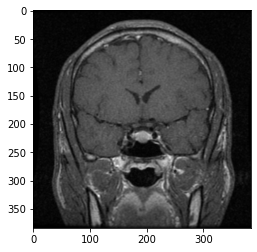

In [ ]:
for file in files:
    
    print(f'converting file {file}')
    file_path = os.path.join(os.path.join(data_dir, folders[1]), file)
    file_data = hdf5storage.loadmat(file_path)
    
    # file_data is dictionary with name 'cjdata' with several fields
    # 'label': image label, refer to readme.txt to know labels 
    # 'image': MRI slice
    # 'tumorBorder': coordinates of the tumor in the image
    # 'tumorMask': binary mask for the tumor region
    
    file_label = file_data["cjdata"]["label"][0][0][0]
    #print(f'label for {file} is {file_label}')
    
    file_image = np.squeeze(file_data["cjdata"]["image"])
    
    # checking files with sizes other than 512x512
    if file_image.shape[0] != 500 or file_image.shape[1] != 500:
        #print(f'image size is {np.shape(file_image)} for {file}')
        #print(f'doing resizing for {file}')
        file_image = cv2.resize(file_image, (384, 384))
    
    file_image = (file_image-np.min(file_image))/(np.max(file_image)-np.min(file_image))
    
    file_tumorBorder = np.squeeze(file_data["cjdata"]["tumorBorder"])
    
    file_tumorMask = np.squeeze(file_data["cjdata"]["tumorMask"])
    
    # save images in a numpy array, you can do the same for tumorBorder and tumorMask
    labels.append(file_label)
    images.append(file_image)
    
    # you can use np.array to convert list to numpy array
    
    # plotting an example image
    if file.startswith('1070') and True:
        plt.imshow(file_image, cmap='gray')

In [ ]:
for index in range(len(images)):
  if labels[index] == 1:
    plt.figure()
    plt.imshow(images[index], cmap='gray')
    plt.axis('off')
    #print(labels[index])

In [ ]:
np.save('/content/drive/MyDrive/Datasets/figshare-brain-tumor/brain_tumor_figshare_384', images)
np.save('/content/drive/MyDrive/Datasets/figshare-brain-tumor/brain_tumor_figshare_labels', labels)